Scikit-learn HistGradientBoostingRegressor() model on MDA_dataframeArthur.csv.

Time Series cross-validation: 24h delay for weather, 1 month gap between train and test sets.
MAE en RMSE can be compared to other models.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

Dataframe from MDA_merge_data.ipynb is loaded, datetime column is dropped in order to run model.

In [2]:
df = pd.read_csv("C:\\Users\Arthur\hello\MDA_dataframeArthur.csv")
df_nd = df.drop('result_timestamp', axis=1)

In [3]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

The target dataset (y) and predictor dataset (X) are created. For y, noise is converted to relative noise (proportion of max value)

In [4]:
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [5]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [6]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [7]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
30922,11,4,5,8,0,71.0,19.28,32.0,257.0,0.0,...,24.78,24.78,24.723,23.846788,1013.26,23.45,63.79,0.0,5.40,305.3
30923,11,4,5,8,0,70.0,19.13,32.0,240.0,0.0,...,24.84,24.84,24.783,24.193493,1013.46,23.15,63.22,0.0,5.22,299.2
30924,11,4,5,8,0,70.0,19.06,31.0,234.0,0.0,...,24.78,24.78,24.723,24.126774,1013.59,23.04,63.18,0.0,5.61,304.6
30925,11,4,5,8,0,69.0,18.84,32.0,229.0,0.0,...,24.87,24.87,24.813,24.144667,1013.72,23.25,62.01,0.0,5.55,298.4
30926,12,4,5,8,0,68.0,18.81,32.0,191.0,0.0,...,24.99,24.99,24.933,24.224405,1013.72,23.31,62.39,0.0,5.65,302.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40917,2,4,28,10,0,91.0,13.00,38.0,0.0,0.0,...,14.39,14.39,14.333,14.198870,1017.68,16.55,80.25,0.0,6.88,165.7
40918,2,4,28,10,0,90.0,12.83,37.0,0.0,0.0,...,14.39,14.39,14.333,14.185340,1017.66,16.68,80.08,0.0,6.99,166.3
40919,2,4,28,10,0,90.0,12.78,38.0,0.0,0.0,...,14.39,14.39,14.333,14.206740,1017.68,16.56,79.75,0.0,6.42,165.4
40920,2,4,28,10,0,90.0,12.78,37.0,0.0,0.0,...,14.39,14.39,14.333,14.314940,1017.44,16.64,79.61,0.0,7.02,167.1


In [8]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction
34922,9,4,16,9,0,84.0,13.90,32.0,163.0,0.0,...,16.59,16.59,16.533,16.339917,1008.95,17.77,69.49,0.00,8.11,359.7
34923,9,4,16,9,0,82.0,13.60,32.0,210.0,0.0,...,16.78,16.78,16.723,16.384344,1008.97,17.63,70.59,0.00,8.05,359.5
34924,9,4,16,9,0,79.0,13.46,31.0,165.0,0.0,...,17.07,17.07,17.013,16.527561,1009.02,17.61,71.20,0.00,8.94,353.8
34925,9,4,16,9,0,79.0,13.63,32.0,144.0,0.0,...,17.31,17.31,17.253,16.762182,1009.04,17.53,71.46,0.00,8.68,353.1
34926,9,4,16,9,0,80.0,14.00,32.0,142.0,0.0,...,17.49,17.49,17.433,16.968314,1009.04,17.66,71.54,0.00,8.26,352.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44917,23,3,24,11,0,86.0,6.88,37.0,0.0,0.0,...,9.11,9.11,9.053,9.123540,999.67,9.50,86.47,0.00,9.36,192.7
44918,23,3,24,11,0,86.0,6.92,38.0,0.0,0.0,...,9.17,9.17,9.113,9.154146,999.64,9.53,86.57,0.03,8.66,191.4
44919,23,3,24,11,0,85.0,6.81,37.0,0.0,0.0,...,9.22,9.22,9.163,9.262167,999.61,9.50,86.58,0.00,8.84,186.4
44920,23,3,24,11,0,85.0,6.78,38.0,0.0,0.0,...,9.22,9.22,9.163,9.232913,999.91,9.45,86.33,0.00,9.20,191.1


In [9]:
# grid search for hyperparameter tuning
param_grid = {
    'learning_rate': (0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17),
    'max_leaf_nodes': (14, 15, 16, 17, 18)}
model = HistGradientBoostingRegressor()
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=ts_cv)
model_grid_search.fit(X, y)


GridSearchCV(cv=TimeSeriesSplit(gap=4320, max_train_size=10000, n_splits=5, test_size=1000),
             estimator=HistGradientBoostingRegressor(), n_jobs=2,
             param_grid={'learning_rate': (0.09, 0.1, 0.11, 0.12, 0.13, 0.14,
                                           0.15, 0.16, 0.17),
                         'max_leaf_nodes': (14, 15, 16, 17, 18)})

In [10]:
accuracy = model_grid_search.score(X, y)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.84


In [11]:
model_grid_search.predict(X.iloc[0:5])

array([0.49911382, 0.49975583, 0.49975583, 0.49975583, 0.49975583])

In [12]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'learning_rate': 0.12, 'max_leaf_nodes': 16}


In [13]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.837317,0.006534,0.012968,0.000541,0.12,16,"{'learning_rate': 0.12, 'max_leaf_nodes': 16}",0.687569,0.697929,0.772339,0.700451,0.062190,0.584095,0.262688,1
9,0.929568,0.007200,0.013268,0.000595,0.1,18,"{'learning_rate': 0.1, 'max_leaf_nodes': 18}",0.713108,0.675863,0.784543,0.717030,0.020562,0.582221,0.283008,2
4,0.749035,0.004244,0.010773,0.000398,0.09,18,"{'learning_rate': 0.09, 'max_leaf_nodes': 18}",0.712396,0.681851,0.751088,0.706778,0.054489,0.581321,0.264348,3
0,0.599954,0.004312,0.010373,0.001017,0.09,14,"{'learning_rate': 0.09, 'max_leaf_nodes': 14}",0.687047,0.704080,0.772044,0.687430,0.055037,0.581128,0.264899,4
2,0.679934,0.006598,0.010772,0.001323,0.09,16,"{'learning_rate': 0.09, 'max_leaf_nodes': 16}",0.666455,0.724563,0.770989,0.679911,0.046798,0.577743,0.267997,5


In [14]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [15]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
17,0.12,16,0.584095,0.262688,1
9,0.1,18,0.582221,0.283008,2
4,0.09,18,0.581321,0.264348,3
0,0.09,14,0.581128,0.264899,4
2,0.09,16,0.577743,0.267997,5
5,0.1,14,0.577658,0.271463,6
8,0.1,17,0.577432,0.291180,7
10,0.11,14,0.575358,0.286536,8
12,0.11,16,0.572228,0.290335,9
7,0.1,16,0.572130,0.306895,10


In [16]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["param_learning_rate"],
    columns=["param_max_leaf_nodes"])

pivoted_cv_results

param_max_leaf_nodes,14,15,16,17,18
param_learning_rate,,,,,
0.09,0.581128,0.571671,0.577743,0.569131,0.581321
0.10,0.577658,0.563133,0.572130,0.577432,0.582221
0.11,0.575358,0.566806,0.572228,0.559463,0.547031
0.12,0.565139,0.566631,0.584095,0.553455,0.564507
0.13,0.561558,0.567985,0.553300,0.559472,0.554559
0.14,0.571695,0.537617,0.555269,0.550169,0.558569
0.15,0.547932,0.524404,0.534732,0.540284,0.522877
0.16,0.538673,0.549130,0.490629,0.553508,0.526626
0.17,0.516424,0.545258,0.506094,0.543184,0.562234


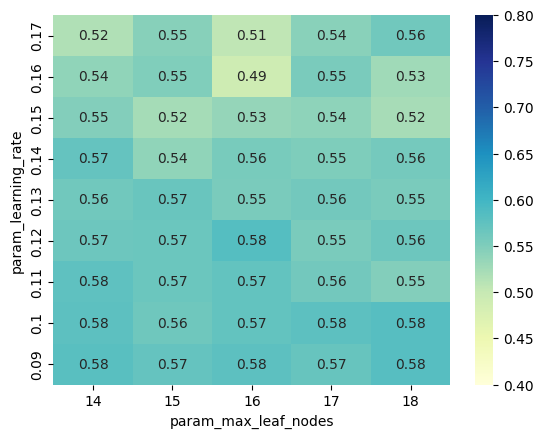

In [17]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.4,
                 vmax=0.8)
ax.invert_yaxis()

In [21]:
#run histogram gradient boosting model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(HistGradientBoostingRegressor(max_leaf_nodes=16,learning_rate=0.12)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.038 +/- 0.012
Root Mean Squared Error: 0.048 +/- 0.013


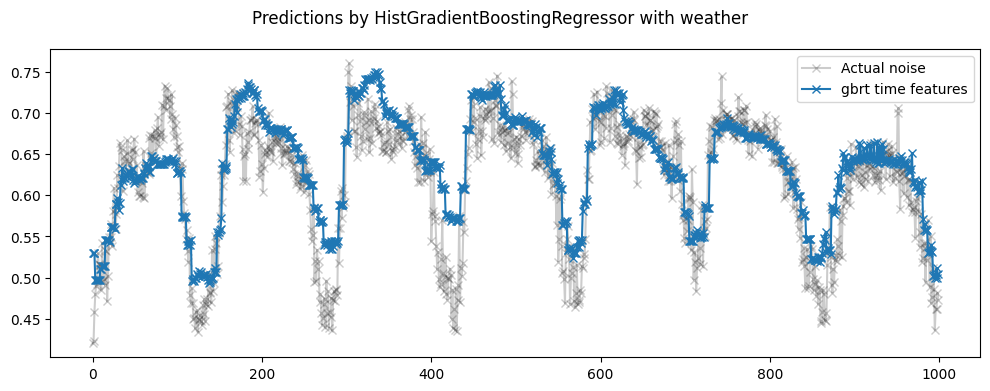

In [22]:
#Qualitative analysis of the impact of features on linear model predictions
gbrt_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_0])

last_hours = slice(-1000, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by HistGradientBoostingRegressor with weather")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual noise",
    color="black",
)
ax.plot(gbrt_predictions[last_hours], "x-", label="gbrt time features")
_ = ax.legend()


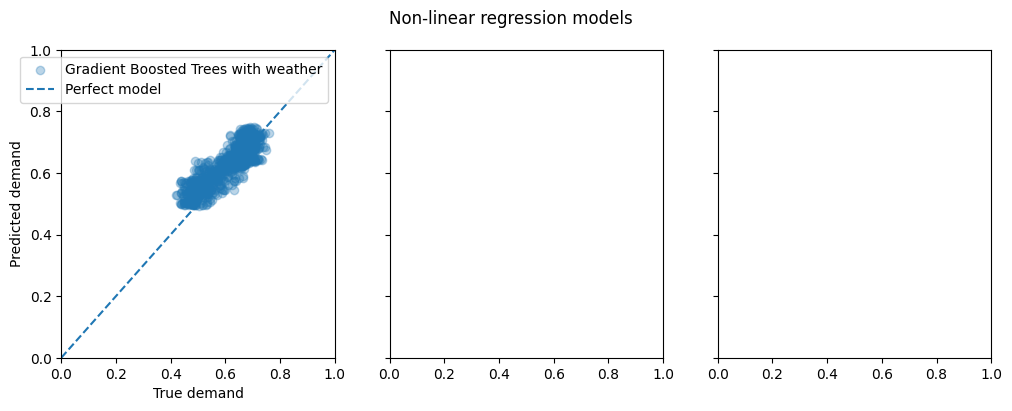

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    gbrt_predictions,
]
labels = [
    "Gradient Boosted Trees with weather",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

plt.show()